#### Fashion MNIST

In [1]:
# MNIST는 머신러닝의 고전적인 문제로 손으로 쓴 숫자 글씨를 모아놓은 데이터세트이다.
# FASHION MNIST는 MNIST의 영향을 받아서 만들어진 데이터세트로 손글씨가 아닌 옷과 신발 가방등의 이미지들을
# 모아놓았다. Grayscale Image라는 점과 범주 수가 10개라는 점, 각 이미지의 크기가 28*28 pixel이라는 점은
# MNIST와 동일하지만 좀 더 어려운 문제로 평가된다.
# 0(티셔츠/상의), 1(바지), 2(스웨터), 3(드레스), 4(코트), 5(샌들), 6(셔츠), 7(운동화), 8(가방), 9(부츠)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
# Fashion MNIST Dataset 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(f"train_X의 shape : {train_X.shape},   train_Y의 shape : {train_Y.shape}\n\
test_X의 shape  : {test_X.shape},   test_Y의 shape  : {test_Y.shape}")

train_X의 shape : (60000, 28, 28),   train_Y의 shape : (60000,)
test_X의 shape  : (10000, 28, 28),   test_Y의 shape  : (10000,)


In [3]:
# Fashion MNIST 범주들 번호와 매칭하는 dictionary 만들기

fashion_mnist_category_dict = {0 : '티셔츠/상의', 1 : '바지', 2 : '스웨터', 3 : '드레스', 4 : '코트', 
                               5 : '샌들', 6 : '셔츠', 7 : '운동화', 8 : '가방', 9 : '부츠'}

print(fashion_mnist_category_dict)

{0: '티셔츠/상의', 1: '바지', 2: '스웨터', 3: '드레스', 4: '코트', 5: '샌들', 6: '셔츠', 7: '운동화', 8: '가방', 9: '부츠'}


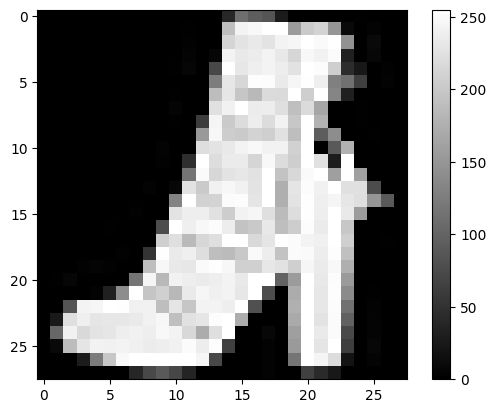

이 이미지는 부츠이다.


In [4]:
img_no = int(input("원하시는 이미지 번호을 선택하세요 : "))

plt.imshow(train_X[img_no], cmap='gray')
plt.colorbar()
plt.show()

print(f"이 이미지는 {fashion_mnist_category_dict[train_Y[img_no]]}이다.")

In [5]:
train_X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
# 훈련을 하기 전에 데이터를 정규화하자. 각각의 픽셀은 0부터 255까지의 숫자로 이루어져 있으므로 각 픽셀값을 
# 255로 나누면 0.0~1.0사이의 값으로 정규화된다.

train_X = train_X / 255.0
test_X = test_X / 255.0

In [9]:
# y값들을 one-hot encoding한다. 범주가 10개이므로 num_classes=10으로 한다.
# train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=10)
# test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=10)
# 그런데 뭔가 비효율적인 느낌이 든다. 우리가 필요로 하는 정보는 정답 라벨 하나뿐인데 그것을 표현하기 위해 10개의 
# 숫자를 사용해야 하는 것이다. 이렇게 대부분의 값이 0인 행렬을 희소행렬(sparse matrix)이라고 한다.
# 행렬이 클 경우 수많은 0을 위한 메모리를 모두 확보하는 것은 시스템에서는 낭비이다. 이럴 때 같은 정보를 압축적으로
# 표현하는 방법을 쓸 수 있다. 0이 아닌 숫자가 있는 위치와 그 숫자의 값만 저장하는 것이다.
# 이미 train_Y와 test_Y는 정보가 이렇게 표현돼 있기 때문에 별도의 변환은 필요없다. 
# 모델 정의에서 원-핫 인코딩이 아닌 이러한 데이터를 받아서 계산하기 위해서는 간단한 수정이 필요하다.

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 원-핫 인코딩이 아닌 정답 행렬을 처리하기 위해 바뀐 부분은 바로 compile함수의 loss에 sparse_categorical_
# crossentropy가 사용되어졌다는 것이다. 이것을 사용하면 별도의 데이터 전처리없이 희소행렬로 변환할 필요없이
# 정답행렬을 사용할 수 있다.
# 또한 원래 데이터가 28*28의 2차원 데이터이기 때문에 데이터를 일렬로 정렬하기 위해 Flatten이라는 레이어를 
# 사용했다. 이 레이어는 다차원 데이터를 1차원으로 정렬하는 역할을 한다.
# 그 다음 2개의 Dense레이어를 통과해서 예측이 출력된다. 마지막 레이어의 뉴런 수가 정답 범주 수와 같은 10개라는
# 점도 놓치면 안되겠다. 
# Adam optimizer의 학습률 값은 0.07이 아닌 default값인 0.001로 했다. 이 값은 일반적으로 많은 상황에서 잘 작동
# 하지만 데이터와 모델에 따라 더 크거나 작은 값을 시도해야 할 수도 있다.

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 6s 3ms/step - loss: 0.5218 - accuracy: 0.8157 - val_loss: 0.4281 - val_accuracy: 0.8518
Epoch 2/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3888 - accuracy: 0.8587 - val_loss: 0.4001 - val_accuracy: 0.8564
Epoch 3/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3486 - accuracy: 0.8727 - val_loss: 0.3498 - val_accuracy: 0.8733
Epoch 4/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3221 - accuracy: 0.8834 - val_loss: 0.3431 - val_accuracy: 0.8765
Epoch 5/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3040 - accuracy: 0.8874 - val_loss: 0.3642 - val_accuracy: 0.8696
Epoch 6/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2883 - accuracy: 0.8934 - val_loss: 0.3393 - val_accuracy: 0.8767
Epoch 7/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2751 - accuracy: 0.8988 - val_loss: 0.3127 - val_accuracy:

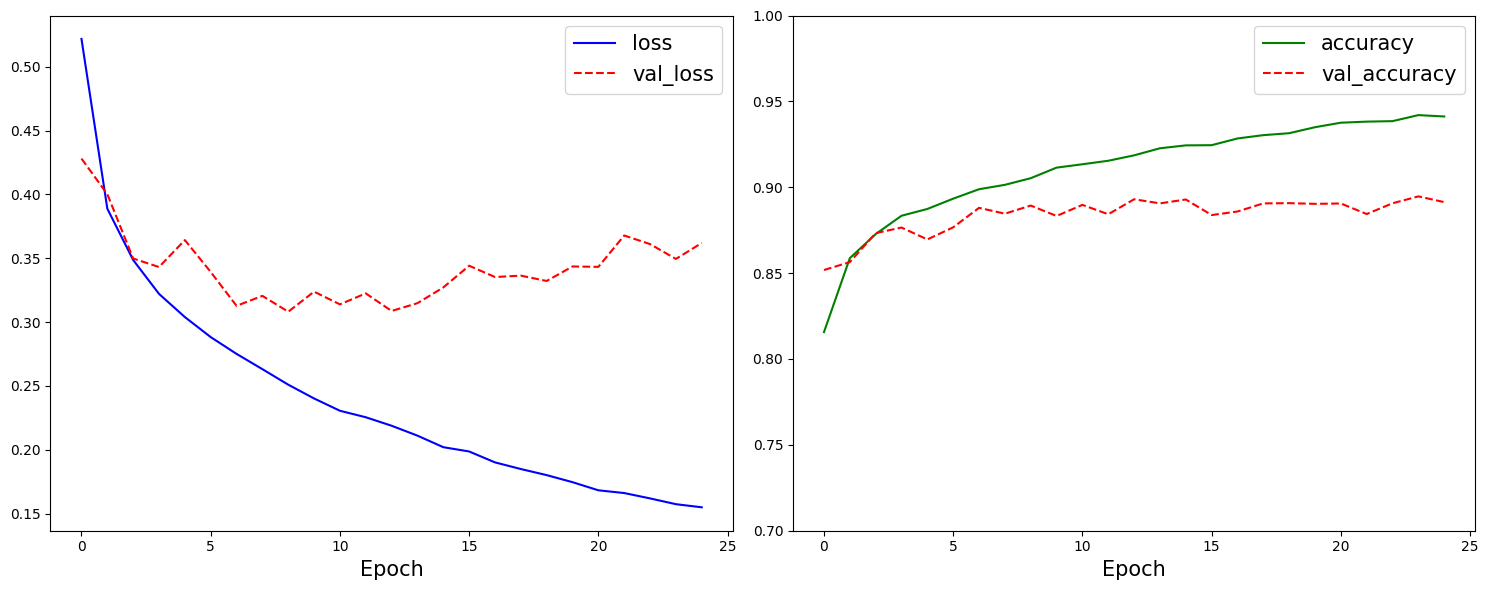

In [15]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch', size=15)
plt.legend(fontsize=15)

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch', size=15)
plt.legend(fontsize=15)
plt.ylim(0.7, 1)

plt.tight_layout()
plt.show()